# 01) Required Imports



In [ ]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# 02) Data Preparation

## Creating encoder
one-hot-encoding works by turning 'variables' into binary representation.

In our case, as the classification is binary - tumor or without tumor - then we can apply this perfectly:

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

## Resizing and creating a list for the images 

It is not possible to directly use images of different sizes in our model. When you define an architecture, you plan how many layers you should have depending on the size of the input. Without having a fixed input you cannot define the architecture of your model. Therefore, it is necessary to convert all your images to the same size.

In [ ]:
data = []
paths = []
result = []

# The next lines basically do the following:

# Scroll through the folder created with all the images containing tumor. Thus, adding to the list 'paths' that will store the path of each image;

for r, d, f in os.walk(r'/content/Yes'): # In this line, use the path of the folder containing the brain tumour dataset;
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))


# The next lines basically do the following:

# Go through the 'paths' list and change the size of each image, convert it to array and add to the 'result' list
# An important detail is that in the 'result' list you will already apply the 'OneHotEncoder'
# in this case at '0' indicating that they are exam images containing brain tumors.

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
# The next lines basically do the following:

# Scroll through the folder created with all the images that do not contain tumor. Thus, adding to the list 'paths' that will store the path of each image;
paths = []
for r, d, f in os.walk(r"/content/No"): # In this line, use the path of the folder containing the brain 'non-tumor' dataset;
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

# The next lines basically do the following:

# Go through the 'paths' list and change the size of each image, convert it to array and add to the 'result' list
# An important detail is that in the 'result' list you will already apply the 'OneHotEncoder'
# in this case at '1' indicating that they are exam images not containing brain tumors.

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

## Spliting the train and test data

We first start by checking the shape of our data:

The last 3 atributes are always the same (x,128,128,3) representing the size of the image and the 3 layers of color.

After that, we reshape the 'result' list. Making it easier to split it in train and test data.  

In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(len(result),2)

We are going to use the function 'train_test_split' to split the data. Also, we are going to use a 'test_size=0.2', meaning that 20% of our data is meant for testing, leaving 80% for training.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# 03) Model architecture

Convolutional Neural Networks (CNNs) is the most popular neural network model being used for image classification problem. The big idea behind CNNs is that a local understanding of an image is good enough. The practical benefit is that having fewer parameters greatly improves the time it takes to learn as well as reduces the amount of data required to train the model. Instead of a fully connected network of weights from each pixel, a CNN has just enough weights to look at a small patch of the image.

You can try a lot of different model architectures to achieve different results.

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

# 04) Model Training

Model training is the phase in the data science development lifecycle where practitioners try to fit the best combination of weights and bias to a machine learning algorithm to minimize a loss function over the prediction range. The purpose of model training is to build the best mathematical representation of the relationship between data features and a target label (in supervised learning).

You can try different epochs values, different batch sizes and so on.

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 9s 3s/step - loss: 22.3232 - val_loss: 74.6035
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 21.6577 - val_loss: 25.4659
Epoch 3/30
3/3 [==============================] - 7s 2s/step - loss: 5.4485 - val_loss: 13.5054
Epoch 4/30
3/3 [==============================] - 7s 2s/step - loss: 3.5843 - val_loss: 11.1915
Epoch 5/30
3/3 [==============================] - 7s 2s/step - loss: 1.4534 - val_loss: 21.7196
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 2.6475 - val_loss: 19.0979
Epoch 7/30
3/3 [==============================] - 7s 2s/step - loss: 0.8791 - val_loss: 11.7746
Epoch 8/30
3/3 [==============================] - 7s 2s/step - loss: 0.8243 - val_loss: 7.3012
Epoch 9/30
3/3 [==============================] - 7s 2s/step - loss: 0.4347 - val_loss: 6.7701
Epoch 10/30
3/3 [==============================] - 7s 2s/step - loss: 0.9454 - val_loss: 7.8388
Epoch 11/30
3/3 [=======================

# 05) Results

A simple graph to show how our loss behaved during training process.

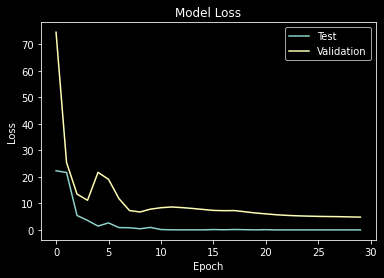

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

Now, we can try to classify some images using our model.

In [ ]:
def names(number):
    if number==0:
        return 'this is a Tumor'
    else:
        return 'this is not a tumor'

100.0% Confidence  this is not a tumor


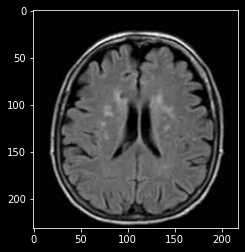

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/braindata/no/17 no.jpg") # In this line, use the path of an image that you want to classify
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + ' % Confidence  ' + names(classification))

We probably could have achieved better results if we had used a larger data set. Also, we can try using different models architectures and try training with different parameters.